In [10]:
# -*- coding: utf-8 -*-
"""
Created on Mon Mar  1 11:32:37 2021

@author: ASUS
"""
#Algo group project
#Strategy of CAPM using for protfolio

import numpy as np
import pandas as pd
from datetime import datetime 
import pandas_datareader.data as pdr
import scipy as sp
import scipy.optimize as opt #用于求最优解
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

#define the conditions of selections and make the stock pool
#暂时没有积分从tushare 下载财务数据，先直接指定几只股票：002803/000895/000627、002677/300815/603444
#get data of stock and index
#批量获取多只股票数据
#从Yahoo Finance获取距离今天n年的数据
def getdata(num_of_stock,n):#先定义获取一只股票数据的函数
    end = datetime(2021,2,28)
    start = datetime(2017,1,5)#获取数据的时间段-起始时间
    stock = pdr.DataReader(num_of_stock, 'yahoo', start, end)
    return stock
    return{'stock code':num_of_stock,'period':n,'stock data':stock}
#批量获取最近5年股票的数据
stocklist=['002803','000895','000672','002677','300815','603444']
#stock_list=[]
stock_name=locals()
for i in stocklist:
    
    if int(i)<600000:
        j=str(i)+'.SZ'
    else:
        j=str(i)+'.SS'
        
    stock_name['chn_'+str(i)]=getdata(j,5)
#批量获取最近5年指数的数据
indexlist=['000001','399001']
index_name=locals()
for k in indexlist:
    
    if int(k)>300000:
        h=str(k)+'.SZ'
    else:
        h=str(k)+'.SS'
        
    index_name['index_'+str(k)]=getdata(h,5)

In [11]:
#发现个总数据不同
#建立一个所有股票的iist方面批量处理
lista=[]
for i in stocklist:
    lista.append(stock_name['chn_'+str(i)])
#300815数据不足三年，删除该项
del lista[4]

In [16]:
#将股票数据起始时间调成一致
#现将数据量都调整到1124个，即从2016.7.12开始
#for l in lista[1:4]:
#    l.drop(l.head(int(1216-1124)).index,inplace=True) # 从头去掉n行 
#然后将数据量都调整到1105个
#for m in lista[0:4]:
#    m.drop(m.head(int(1124-1005)).index,inplace=True) #从头去掉n行 
#至此，所有的股票对应的数据都是1005个，即从2007.1.5
#for i in stock_list:
    #i.drop(i.head(int(1124-1074)).index,inplace=True) # 从头去掉n行 
#insert函数在指定位置添加元素

#using the pool to build the portforlio(well diversified=portfolio stand deviation minimum)
#创建组合的有效前沿和有效前沿上的组合
#先把股票数据转为日收益数据（累积）

for o in lista:    
    o['daily_change_percent']=''#先创建一个空白列
    o['daily_change_percent'][0]=0

    p=1
    while p<1005:
        o['daily_change_percent'][p]=(o['Adj Close'][p]/o['Adj Close'][p-1])-1
        p=p+1
        
for q in lista:
    q['acc_change_percent']=''#先创建一个空白列
    q['acc_change_percent'][0]=0

    p=1
    while p<1005:
        q['acc_change_percent'][p]=(q['Adj Close'][p]/q['Adj Close'][0])-1
        p=p+1       
#def portfolio_index(bchmkday,weights,):
#weight=[]#用有效前沿来求
#获得组合方差
#全部转成float类型
for x in range(len(lista)):
    lista[x]=lista[x].astype(float)
    
#cor=float(chn_000672['daily_change_percent'].corr(chn_000895['daily_change_percent']))
#listb=[]
#listb.append(cor)
#print(listb)
#相关系数集
cor=[]
for u in range(len(lista)):
    for v in range(len(lista)):
        cor.append(lista[u]['daily_change_percent'].corr(lista[v]['daily_change_percent']))
def std_dev(data1):
    avg=np.mean(data1)*252
    num=len(data1)
    bb=0
    for aa in range(num):
        bb=bb+data1[aa]-avg
        std_dev=bb/num
    return std_dev  

<ipython-input-16-14c2d5d60269>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o['daily_change_percent'][0]=0
<ipython-input-16-14c2d5d60269>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o['daily_change_percent'][p]=(o['Adj Close'][p]/o['Adj Close'][p-1])-1
<ipython-input-16-14c2d5d60269>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q['acc_change_percent'][0]=0
<ipython-input-16-14c2d5d60269>:32: SettingWithCopyWarning: 
A

In [ ]:
#不要重新跑这一段的内容！！！！！！！
#求权重最优解
def avg_portfolio(w):  
    avg_portfolio=0
    for cc in range(len(lista)):
        avg_portfolio=avg_portfolio+w[cc-1]*np.mean(lista[cc-1]['daily_change_percent'])*252
    return avg_portfolio
#print(cor)
#len(cor)
w1=0
w2=0
w3=0
w4=0
w5=0
var = 0.0
SRI=0
rf=0.025
list_sri=[]
list_w=[]
bit=0.25
while w5<=1:
    w3=0
    w2=0
    w1=0  
    w4=0
    while w4<=float(1-w5):
        w2=0
        w1=0
        w3=0
        while w3<=float(1-w4-w5):
            w1=0
            w2=0
            while w2<=float(1-w3-w4-w5):
                w1=1-w2-w3-w4-w5
                w=[w1,w2,w3,w4,w5]
                for r in range(len(lista)):
                    for s in range(len(lista)):
                        var=var+w[r]*w[s]*std_dev(lista[r]['daily_change_percent'])*std_dev(lista[s]['daily_change_percent'])*(lista[r]['daily_change_percent'].corr(lista[s]['daily_change_percent']))
                SRI=(avg_portfolio(w)-rf)/var
                list_sri.append(SRI)
                list_w.append([w1,w2,w3,w4,w5])
                print(SRI)
                var=0   
                SRI=0  
                w2=w2+bit
            w3=w3+bit
        w4=w4+bit
    w5=w5+bit                 
#输出最佳参数
max_SRI_index=list_sri.index(max(list_sri,key=abs))
print('location=',max_SRI_index,'Max SRI=',list_sri[max_SRI_index])
print('w=',list_w[max_SRI_index])

In [22]:
optimal_w=[0.20000000000000004, 0.2, 0.2, 0.30000000000000004, 0.1]

data_portfolio=0
for ee in range(len(optimal_w)):
    data_portfolio=data_portfolio+lista[ee-1]*optimal_w[ee-1]   
print(data_portfolio)

data_portfolio['AnDaiRet']=''
data_portfolio['AnDaiRet']=data_portfolio['daily_change_percent']*252

annualized_daily_return_portfolio=0
for dd in range(len(optimal_w)):
    annualized_daily_return_portfolio=annualized_daily_return_portfolio+lista[dd-1]['daily_change_percent']*252*optimal_w[dd-1]
    
print(annualized_daily_return_portfolio)


#处理两个benchmark的数据
#处理到同一区间内数据量一致
index_000001['null']=0
index_000001['index_399001']=index_000001['null']+index_399001['Adj Close']
index_000001['index_399001'][157]=float(10658.9)
index_000001['index_399001'][162]=float(10880.4)

#加0000001
index_000001['000001_daily_change_percent']=''#先创建一个空白列
index_000001['000001_daily_change_percent'][0]=0
p=1
while p<1005:
    index_000001['000001_daily_change_percent'][p]=(index_000001['Adj Close'][p]/index_000001['Adj Close'][p-1])-1
    p=p+1


annualized_daily_return_portfolio=pd.DataFrame(annualized_daily_return_portfolio)
annualized_daily_return_portfolio['AnDaiRet_SH']=''
annualized_daily_return_portfolio['AnDaiRet_SH']=index_000001['000001_daily_change_percent']*252

#加399001
index_000001['399001_daily_change_percent']=''#先创建一个空白列
index_000001['399001_daily_change_percent'][0]=0
p=1
while p<1005:
    index_000001['399001_daily_change_percent'][p]=(index_000001['index_399001'][p]/index_000001['index_399001'][p-1])-1
    p=p+1

annualized_daily_return_portfolio['AnDaiRet_SZ']=''
annualized_daily_return_portfolio['AnDaiRet_SZ']=index_000001['399001_daily_change_percent']*252

annualized_daily_return_portfolio.columns=annualized_daily_return_portfolio.columns.str.replace('daily_change_percent', 'AnDaiRetPortfolio')
annualized_daily_return_portfolio.describe()
#annualized_daily_return_portfolio 是最终的数据局，时间序列

                 High        Low       Open      Close      Volume  Adj Close  \
Date                                                                            
2017-01-05  22.689100  22.306775  22.593100  22.369695  21519180.2  20.154801   
2017-01-06  23.419799  22.872848  23.202539  22.966833  19511227.3  20.710526   
2017-01-09  24.110381  23.536799  23.896307  23.845156  15315227.3  21.495026   
2017-01-10  25.134674  24.733253  24.881609  25.018986  14617029.5  22.563956   
2017-01-11  26.190374  25.671481  26.126373  25.710014  14557742.9  23.183118   
...               ...        ...        ...        ...         ...        ...   
2021-02-22  64.315998  59.897000  63.134000  60.695000  19908545.4  60.695000   
2021-02-23  62.627000  59.057000  60.296000  61.684000  12475624.8  61.684000   
2021-02-24  62.782000  59.979000  61.169001  60.630001  14100761.2  60.630001   
2021-02-25  61.452999  58.263001  60.801000  58.988002  12649359.4  58.988002   
2021-02-26  58.772000  55.92

<ipython-input-22-ac16c40fe6ce>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  index_000001['index_399001'][157]=float(10658.9)
<ipython-input-22-ac16c40fe6ce>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  index_000001['index_399001'][162]=float(10880.4)
<ipython-input-22-ac16c40fe6ce>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  index_000001['000001_daily_change_percent'][0]=0
<ipython-input-22-ac16c40fe6ce>:30: SettingWit

,AnDaiRetPortfolio
count,1005.000000
mean,0.283079
std,4.367858
min,-21.853856
25%,-2.169546
50%,0.317243
75%,2.756354
max,14.160846


head:                   sh        sz      port
Date                                    
2017-01-05         0         0  0.000000
2017-01-06 -0.882868  -1.99504 -2.625442
2017-01-09   1.35135   1.03915  2.948634
2017-01-10 -0.760091 -0.620756  4.716908
2017-01-11    -1.986  -2.22158 -5.027025 
Shape: (1005, 3)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1005 entries, 2017-01-05 to 2021-02-26
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sh      1005 non-null   float64
 1   sz      1005 non-null   float64
 2   port    1005 non-null   float64
dtypes: float64(3)
memory usage: 31.4 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1005 entries, 2017-01-05 to 2021-02-26
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sh      1005 non-null   float64
 1   sz      1005 non-null   float64
 2   port    1005 non-null   float64
dtypes: float64(3)
memory usag

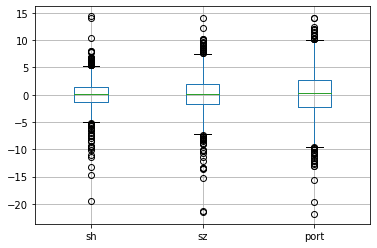

            sh        sz      port
sh    1.000000  0.923211  0.718588
sz    0.923211  1.000000  0.751374
port  0.718588  0.751374  1.000000


C:\Users\vivia\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


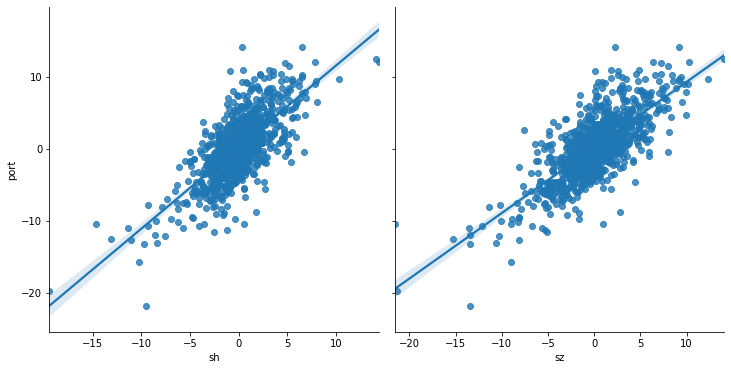

原始数据特征: (1005, 2) ,训练数据特征: (804, 2) ,测试数据特征: (201, 2)
原始数据标签: (1005,) ,训练数据标签: (804,) ,测试数据标签: (201,)
最佳拟合线:截距 0.17416140937902358 ,回归系数： [0.25738739 0.71325019]
0.5945745613466134


In [23]:
#do regression: y=return of portfolio;x=benchmark
#using the training data and do the back test
data=annualized_daily_return_portfolio
port=data.iloc[:,0]
sh=data.iloc[:,1]
sz=data.iloc[:,2]
data.iloc[:,0]=sh
data.iloc[:,1]=sz
data.iloc[:,2]=port
data=data.rename(columns={'AnDaiRetPortfolio':'sh','AnDaiRet_SH':'sz','AnDaiRet_SZ':'port'})
print('head:',data.head(),'\nShape:',data.shape)
data['sh'] = pd.to_numeric(data['sh']) 
data['sz'] = pd.to_numeric(data['sz']) 
data.index = pd.to_datetime(data.index)
data.describe()
data.info()
#数据描述
new_adv_data=pd.DataFrame(data)
new_adv_data.info()
print(new_adv_data.describe())
#缺失值检验
print(new_adv_data[new_adv_data.isnull()==True].count()) 
new_adv_data.boxplot()
plt.savefig("boxplot.jpg")
plt.show()
##相关系数矩阵 r(相关系数) = x和y的协方差/(x的标准差*y的标准差) == cov（x,y）/σx*σy
#相关系数0~0.3弱相关0.3~0.6中等程度相关0.6~1强相关
print(new_adv_data.corr())
#建立散点图来查看数据集里的数据分布
#seaborn的pairplot函数绘制X的每一维度和对应Y的散点图。通过设置size和aspect参数来调节显示的大小和比例。
# 通过加入一个参数kind='reg'，seaborn可以添加一条最佳拟合直线和95%的置信带。
# import matplotlib.dates as mdates
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())    # 按月显示,按日显示的话，将MonthLocator()改成DayLocator()
# plt.gcf().autofmt_xdate()
sns.pairplot(new_adv_data, x_vars=['sh','sz'], y_vars='port', size=5, aspect=1,kind = 'reg')
plt.savefig("pairplot.jpg")
plt.show()
#利用sklearn里面的包来对数据集进行划分，以此来创建训练集和测试集
#train_size表示训练集所占总数据集的比例
X_train,X_test,Y_train,Y_test = train_test_split(new_adv_data.iloc[:,:2],new_adv_data.port,train_size=.80)
print("原始数据特征:",new_adv_data.iloc[:,:2].shape,
      ",训练数据特征:",X_train.shape,
      ",测试数据特征:",X_test.shape)
print("原始数据标签:",new_adv_data.port.shape,
      ",训练数据标签:",Y_train.shape,
      ",测试数据标签:",Y_test.shape)
model = LinearRegression()
model.fit(X_train,Y_train) 
a  = model.intercept_#截距 
b = model.coef_#回归系数
print("最佳拟合线:截距",a,",回归系数：",b)
#y=0.228+0.295∗sh+0.712∗sz
 
#R方检测
#决定系数r平方
#对于评估模型的精确度
#y误差平方和 = Σ(y实际值 - y预测值)^2
#y的总波动 = Σ(y实际值 - y平均值)^2
#有多少百分比的y波动没有被回归拟合线所描述 = SSE/总波动
#有多少百分比的y波动被回归线描述 = 1 - SSE/总波动 = 决定系数R平方
#对于决定系数R平方来说1） 回归线拟合程度：有多少百分比的y波动刻印有回归线来描述(x的波动变化)
#2）值大小：R平方越高，回归模型越精确(取值范围0~1)，1无误差，0无法完成拟合
score = model.score(X_test,Y_test)
print(score) 

[ -4.15261457   4.4286369    1.69964879   0.1961307    4.6088248
   2.07830267   2.16750376  13.84967622   0.11806841   1.51107994
   0.56109255  -0.44521168   1.5428067   -1.87175692   4.39906678
   6.57982479  -0.36207443  -0.81241486  -1.76870799   3.31165904
   2.10577717   1.14385183  -3.68101684  -4.5442351    1.73696302
   8.39136062  -0.20320585   0.65115505  -0.83336315   1.87669057
   1.74070571  -0.46423071   7.11864364   4.74697979  -0.5666563
  -1.10545275   0.40314906   2.0035014    0.471939     1.29190143
   0.15101296  -1.35443535  -0.98343039   4.37459598  -1.85926107
   1.96660575   2.92736027  -1.05995968   1.86469338   2.30538148
  -1.63376468   0.12340979   1.09283685   3.16215824   1.02893695
   0.07638471   3.10603082   4.45120087  -0.3304809    1.72414084
   1.60216075   1.16642652   3.98604748   6.73785913   7.56421401
   0.99879271   3.17020242  -0.05023149   1.72838492   1.67288637
   6.44842001   4.61025416  -2.76445247   1.352086     0.77605568
   0.6451831

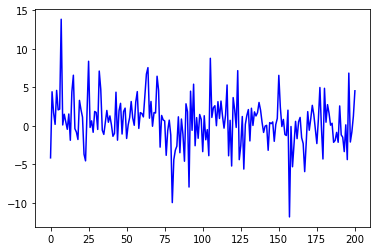

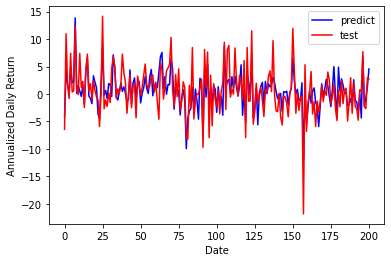

Mean Squared Error: 7.91
Coefficient of Determination (R^2 Score): 0.59
Explained Variance: 0.60


In [24]:
#对线性回归进行预测
Y_pred = model.predict(X_test) 
print(Y_pred)

plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
#显示图像
# plt.savefig("predict.jpg")
plt.show()

#as we suppoesed the stocks in portfolio are likely to belong to SH and SZ exchange, so we use to variables which are return of SH index and SZ index 
plt.figure()
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("Date")
plt.ylabel('Annualized Daily Return')
plt.savefig("ROC.jpg")
plt.show()
# The mean squared error
print('Mean Squared Error: %.2f'
      % mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of Determination (R^2 Score): %.2f'
      % r2_score(Y_test, Y_pred))
# The explained variance
print('Explained Variance: %.2f'
      % explained_variance_score(Y_test, Y_pred))